# ✨ Apresentação

 Curso : Machine Learning


 Aluna: Camila Perazzo

Atividade de desempenho dos Modelos Através da Engenharia de Features - 05/06/2023. 

# 🎲 Questões da atividade

**1) Nesta atividade, utilize o k-Nearest Neighbor para verificar o desempenho do algoritmo de acordo com
a engenharia de features empregada.**


**2) Compare os resultados obtidos em todos os processos do item anterior e justifique as diferenças obtidas
através dos conceitos de engenharia de features.**

# 🎲 Questão 1

## 1) Utilize o dataset ionosphere presente na pasta datasets para realizar uma tarefa de classificação binária.

In [417]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import VarianceThreshold


In [418]:
#Preparando o Ambiente
import pandas as pd   

#Importando o arquivo de dados 
df = pd.read_csv('/content/ionosphere.data', header=None)

#Verificando o formato do conjunto de dados 
print("Shape do conjunto de dados: ",df.shape)

Shape do conjunto de dados:  (351, 35)


In [419]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,1.00,-0.06,0.85,0.02,0.83,-0.38,1.00,0.04,...,-0.51,0.41,-0.46,0.21,-0.34,0.42,-0.54,0.19,-0.45,g
1,1,0,1.00,-0.19,0.93,-0.36,-0.11,-0.94,1.00,-0.05,...,-0.27,-0.20,-0.18,-0.19,-0.12,-0.17,-0.06,-0.14,-0.02,b
2,1,0,1.00,-0.03,1.00,0.00,1.00,-0.12,0.89,0.01,...,-0.40,0.59,-0.22,0.43,-0.17,0.60,-0.24,0.56,-0.38,g
3,1,0,1.00,-0.45,1.00,1.00,0.71,-1.00,0.00,0.00,...,0.91,0.52,1.00,1.00,-0.20,0.26,1.00,-0.32,1.00,b
4,1,0,1.00,-0.02,0.94,0.07,0.92,-0.23,0.77,-0.16,...,-0.65,0.13,-0.53,0.02,-0.62,-0.06,-0.60,-0.05,-0.66,g


O conjunto de dados da **ionosphere** contém recursos obtidos de sinais de radar focados na camada de ionosfera da atmosfera da Terra. A tarefa é determinar se o sinal mostra a presença de algum objeto ou apenas ar vazio, classificando-o como bom (*g*) ou ruim (*b*).

## 2) Separe os dados de entrada e saída considerando que a coluna de índice 34 corresponde ao label dos dados de cada linha.

In [420]:
# Verificando o número de classes
df[34].unique()

array(['g', 'b'], dtype=object)

In [421]:
# Separe os dados de entrada e saída
X = df.drop(34, axis=1, inplace=False)
y = df[34].replace({'g':0,'b':1}).copy()

# Exemplo de exibição dos dados separados
print("Dados de entrada:")
print(X.head())

print("Dados de saída:")
print(y.head())

Dados de entrada:
   0   1    2     3    4     5     6     7    8     9   ...    24    25    26  \
0   1   0 1.00 -0.06 0.85  0.02  0.83 -0.38 1.00  0.04  ...  0.57 -0.51  0.41   
1   1   0 1.00 -0.19 0.93 -0.36 -0.11 -0.94 1.00 -0.05  ... -0.20 -0.27 -0.20   
2   1   0 1.00 -0.03 1.00  0.00  1.00 -0.12 0.89  0.01  ...  0.58 -0.40  0.59   
3   1   0 1.00 -0.45 1.00  1.00  0.71 -1.00 0.00  0.00  ...  1.00  0.91  0.52   
4   1   0 1.00 -0.02 0.94  0.07  0.92 -0.23 0.77 -0.16  ...  0.03 -0.65  0.13   

     27    28    29    30    31    32    33  
0 -0.46  0.21 -0.34  0.42 -0.54  0.19 -0.45  
1 -0.18 -0.19 -0.12 -0.17 -0.06 -0.14 -0.02  
2 -0.22  0.43 -0.17  0.60 -0.24  0.56 -0.38  
3  1.00  1.00 -0.20  0.26  1.00 -0.32  1.00  
4 -0.53  0.02 -0.62 -0.06 -0.60 -0.05 -0.66  

[5 rows x 34 columns]
Dados de saída:
0    0
1    1
2    0
3    1
4    0
Name: 34, dtype: int64


## 3) Separe os dados em dados de treinamento e teste utilizando a proporção 70% e 30%, respectivamente, e random state = 0.

In [422]:
# Separe os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


## 4) Estabeleça arbitrariamente o número de vizinhos k = 5, inicialmente

In [423]:
k = 5


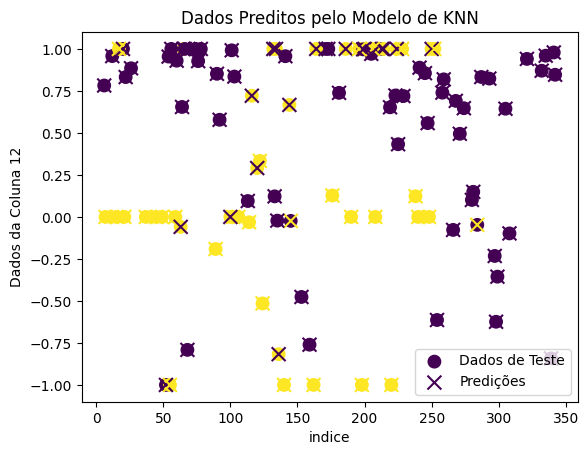

In [424]:
# Criar uma instância do classificador k-NN
knn = KNeighborsClassifier(k)

# Treinar o modelo com os dados de treinamento
knn.fit(X_train, y_train)

# Realizar a classificação dos dados de teste
y_pred = knn.predict(X_test)

# Verificando as predições visualmente
fig, ax = plt.subplots()
ax.scatter(X_test.index, X_test.loc[:,12], c = y_test, s = 80)
ax.scatter(X_test.index, X_test.loc[:,12], c = y_pred, marker = 'x', s = 100)
ax.set_xlabel('indice')
ax.set_ylabel('Dados da Coluna 12')
ax.set_title('Dados Preditos pelo Modelo de KNN')
ax.legend(['Dados de Teste', 'Predições'],loc='best')
plt.show()

## 5) Realize a classificação e obtenha os seguintes resultados:

  (a) Acurácia.

  (b) Precisão.

  (c) Recall.

  (d) F1-Score.

  (e) Plote a matriz de confusão obtida

In [425]:
# Calcular a acurácia
acuracia = accuracy_score(y_test, y_pred)
print("Acurácia:", acuracia)

# Calcular a precisão
precisao = precision_score(y_test, y_pred)
print("Precisão:", precisao)

# Calcular o recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calcular o F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Acurácia: 0.839622641509434
Precisão: 0.9354838709677419
Recall: 0.6590909090909091
F1-Score: 0.7733333333333332


In [426]:
# Gerando o Classification Report
report = classification_report(y_test, y_pred)
print(report)
print('Accuracy :', accuracy_score(y_test,y_pred))
print('Precision Score :', precision_score(y_test,y_pred))
print('Recall Score :', recall_score(y_test,y_pred))
print('F1 Score :', f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88        62
           1       0.94      0.66      0.77        44

    accuracy                           0.84       106
   macro avg       0.87      0.81      0.82       106
weighted avg       0.86      0.84      0.83       106

Accuracy : 0.839622641509434
Precision Score : 0.9354838709677419
Recall Score : 0.6590909090909091
F1 Score : 0.7733333333333332


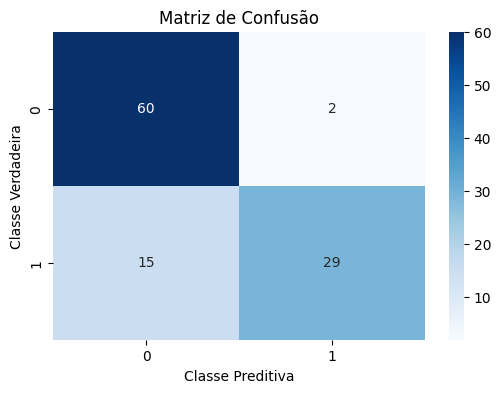

In [427]:
# Plotar a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel("Classe Preditiva")
plt.ylabel("Classe Verdadeira")
plt.show()


## 6) Repita todo o processo dos itens 1 até 5 utilizando o método de Seleção de Features por limiar de variância, considerando o limiar de 35%.

In [428]:
# Lendo o arquivo
df2 = pd.read_csv("/content/ionosphere.data", delimiter=',', header=None)

# Criando as variáveis que irão receber os atributos e os labels
X = df2.drop(34, axis=1, inplace=False)
y = df2[34].replace({'g':0,'b':1}).copy()

# Estabelecendo o limiar de variância de 35%
threshold = .35
# VarianceThreshold: responsável por remover as features que não atendem ao limiar de variância definido
selector = VarianceThreshold(threshold=threshold )
# Selecionando as features
X_selected_features = selector.fit_transform(X)

In [429]:
# Criando a variável que irá receber as features selecionadas
selected_features = X.columns[selector.get_support(indices=True)]
# Fazendo um print das features selecionadas
print(selected_features)

Int64Index([12, 14, 16, 18, 20, 22], dtype='int64')


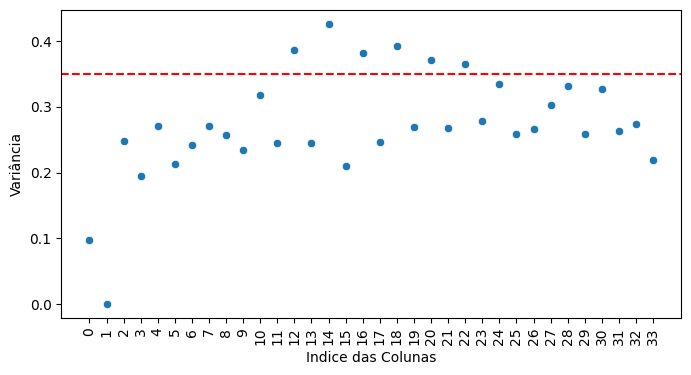

In [430]:
# Demonstrando graficamente
# Calcular a variância das colunas do DataFrame
variancias = df2.var(numeric_only=True)
fig, ax = plt.subplots(figsize=(8, 4))
# Plotar o gráfico de dispersão
sns.scatterplot(x=variancias.index, y=variancias)
# Adicionar a linha horizontal tracejada em y=0.3
plt.axhline(y=0.35, color='red', linestyle='--')
plt.xticks(range(0, 34, 1), rotation='vertical')
# Exibir o gráfico
plt.xlabel("Indice das Colunas", size = 10)
plt.ylabel("Variância", size = 10)
plt.show()

In [431]:
# Separando dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y,test_size=0.3, random_state=0)

# Definindo o número de vizinhos
k = 5
# Criando a variável que irá receber o modelo kNN
knn = KNeighborsClassifier(k)
# Treinamento do modelo
knn.fit(X_train,y_train)
# Criando a variável que irá receber os dados de teste previstos
y_pred = knn.predict(X_test)


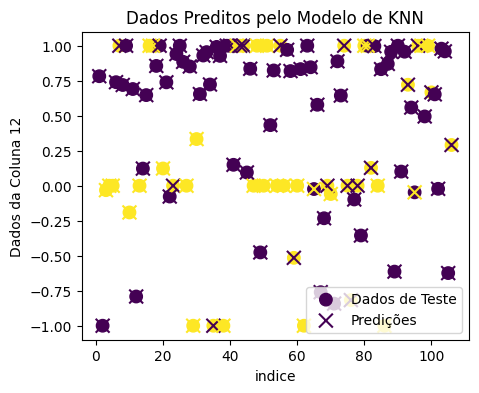

In [432]:
# Verificando as predições visualmente
fig, ax = plt.subplots(figsize=(5, 4))
ax.scatter(range(1,X_test.shape[0]+1), X_test[:,0], c = y_test, s = 80)
ax.scatter(range(1,X_test.shape[0]+1), X_test[:,0], c = y_pred, marker = 'x', s= 100)
ax.set_xlabel('indice')
ax.set_ylabel('Dados da Coluna 12')
ax.set_title('Dados Preditos pelo Modelo de KNN')
ax.legend(['Dados de Teste', 'Predições'],loc='best')
plt.show()


In [433]:
# Gerando o Classification Report
report_thr = classification_report(y_test, y_pred)
print(report_thr)
print('Accuracy :', accuracy_score(y_test,y_pred))
print('Precision Score :', precision_score(y_test,y_pred))
print('Recall Score :', recall_score(y_test,y_pred))
print('F1 Score :', f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86        62
           1       0.90      0.61      0.73        44

    accuracy                           0.81       106
   macro avg       0.84      0.78      0.79       106
weighted avg       0.83      0.81      0.80       106

Accuracy : 0.8113207547169812
Precision Score : 0.9
Recall Score : 0.6136363636363636
F1 Score : 0.7297297297297297


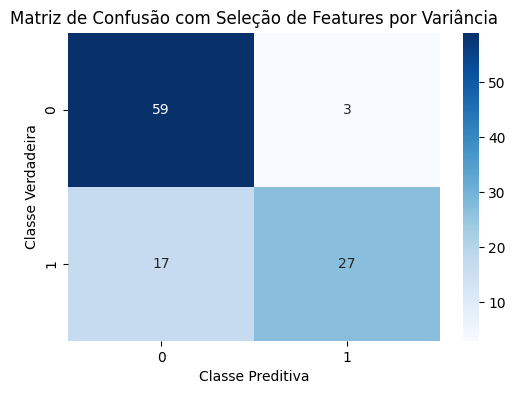

In [434]:
# Plote a matriz de confusão com os dados selecionados
matriz_confusao_variancia = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusao_variancia, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão com Seleção de Features por Variância")
plt.xlabel("Classe Preditiva")
plt.ylabel("Classe Verdadeira")
plt.show()

## 7) Repita todo o processo itens 1 até 5 utilizando o método de Extração de Features por Análise de Componentes Principais (PCA), considerando a porcentagem de informação a ser mantida no prolema de 85%.

In [435]:
from sklearn.decomposition import PCA

# Criando as variáveis que irão receber os atributos e os labels
X = df2.drop(34, axis=1, inplace=False)
y = df2[34].replace({'g':0,'b':1}).copy()
# Transformando dados com o PCA
pca = PCA(n_components= .85)
X_new = pca.fit_transform(X)
# Separando dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3,random_state=0)
# Definindo o número de vizinhos
k = 5
# Criando a variável que irá receber o modelo kNN
knn = KNeighborsClassifier(k).fit(X_train,y_train)
# Criando a variável que irá receber os dados de teste previstos
y_pred = knn.predict(X_test)
# Gerando o Classification Report
report_PCA = classification_report(y_test, y_pred)
print(report_PCA)
print('Accuracy :', accuracy_score(y_test,y_pred))
print('Precision Score :', precision_score(y_test,y_pred))
print('Recall Score :', recall_score(y_test,y_pred))
print('F1 Score :', f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90        62
           1       0.94      0.73      0.82        44

    accuracy                           0.87       106
   macro avg       0.89      0.85      0.86       106
weighted avg       0.88      0.87      0.86       106

Accuracy : 0.8679245283018868
Precision Score : 0.9411764705882353
Recall Score : 0.7272727272727273
F1 Score : 0.8205128205128205


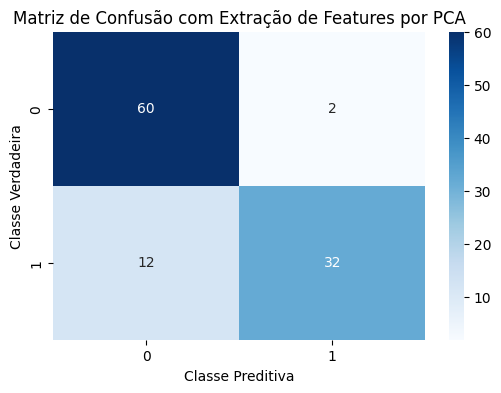

In [436]:
# Plote a matriz de confusão com os dados selecionados
matriz_confusao_variancia = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusao_variancia, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão com Extração de Features por PCA")
plt.xlabel("Classe Preditiva")
plt.ylabel("Classe Verdadeira")
plt.show()


Variância Total Explicada: 86.15%


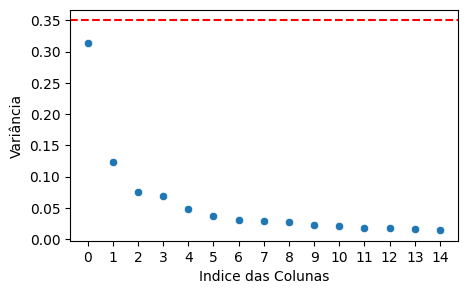

In [437]:
# Informações do PCA
# Obter o percentual de informação explicada
variance_ratio = pd.DataFrame(pca.explained_variance_ratio_.reshape(-1,1))
explained_variance = sum(variance_ratio[0]) * 100
# Plotar o gráfico de dispersão da variância das novas colunas
plt.figure(figsize=(5, 3))
sns.scatterplot(x=variance_ratio.index, y=variance_ratio[0])
# Adicionar a linha horizontal tracejada em y=0.3
plt.axhline(y=0.35, color='red', linestyle='--')
# Definir os valores do eixo x com passo de 1 em 1
plt.xticks(range(0, 15, 1))
print(f'\nVariância Total Explicada: {explained_variance:.2f}%')
# Exibir o gráfico
plt.xlabel("Indice das Colunas", size = 10)
plt.ylabel("Variância", size = 10)
plt.show()

## 8) Considerando os dados transformados através do uso da PCA, repita todo o processo dos itens 1 a 5, mas aplique a técnica de Validação Cruzada por k-fold para encontrar o número de vizinhos mais próximos ideal para o problema. Considere variar k de 1 até 20, e considere o número de pastas do k-fold (o parâmetro cv da função cross_val_score) igual a 5.

In [438]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
import numpy as np
def highlight_greaterthan(s, threshold, column):
  is_max = pd.Series(data=False, index=s.index)
  is_max[column] = s.loc[column] >= threshold
  return ['background-color: yellow' if is_max.any() else '' for v in is_max]
# Criando as variáveis que irão receber os atributos e os labels
X = df2.drop(34, axis=1, inplace=False)
y = df2[34].replace({'g':0,'b':1}).copy()
X_new = PCA(n_components=0.85).fit_transform(X)
# Separando dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3,random_state=0)

dados = []
for k in range(1,21):

  # Criando a variável que irá receber o modelo kNN
  knn = KNeighborsClassifier(k).fit(X_train,y_train)
  scores = cross_val_score(knn, X, y, cv=5)

  # Criando a variável que irá receber os dados de teste previstos
  y_pred = knn.predict(X_test)

  dados.append([k,
                np.mean(scores),
                np.std(scores),
                accuracy_score(y_test,y_pred),
                precision_score(y_test,y_pred),
                recall_score(y_test,y_pred),
                f1_score(y_test,y_pred),
                ])
df_result = pd.DataFrame(dados, columns =['Valor_K','Mean_Cross_Val_Score','STD_Cross_val_Score','Accuracy_Score','Precision_Score','Recall_Score','F1_Score'])

In [439]:
def pintar_maior_valor_por_coluna(dataframe):

  # Obtém o maior valor de cada coluna
  maiores_valores = dataframe.max()

  # Cria um estilo para pintar o maior valor de cada coluna
  def destaque_maior_valor(valor):
    return ['background-color: yellow; color: black' if v else '' for v in np.isin(valor, maiores_valores)]

  estilo = dataframe.style.apply(destaque_maior_valor)
  return estilo
# Chame a função e atribua o resultado a uma variável
estilo_destacado = pintar_maior_valor_por_coluna(df_result.drop(['Valor_K'],axis=1))
# Exiba o DataFrame com os maiores valores destacados
estilo_destacado

,Mean_Cross_Val_Score,STD_Cross_val_Score,Accuracy_Score,Precision_Score,Recall_Score,F1_Score
0,0.843300,0.041413,0.915094,0.972973,0.818182,0.888889
1,0.797666,0.055426,0.858491,1.000000,0.659091,0.794521
2,0.831871,0.063589,0.896226,0.945946,0.795455,0.864198
3,0.806278,0.037836,0.839623,0.935484,0.659091,0.773333
4,0.826197,0.038804,0.867925,0.941176,0.727273,0.820513
5,0.803421,0.031785,0.820755,0.931034,0.613636,0.739726
6,0.820483,0.032215,0.849057,0.937500,0.681818,0.789474
7,0.809095,0.023363,0.849057,0.937500,0.681818,0.789474
8,0.823300,0.034790,0.849057,0.937500,0.681818,0.789474
9,0.814809,0.028591,0.849057,0.937500,0.681818,0.789474


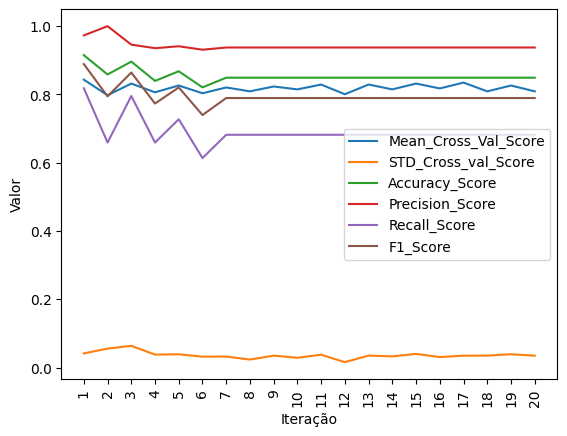

In [440]:
# Verificando visualmente
plt.plot(df_result.index+1, df_result['Mean_Cross_Val_Score'],label='Mean_Cross_Val_Score')
plt.plot(df_result.index+1, df_result['STD_Cross_val_Score'],label='STD_Cross_val_Score')
plt.plot(df_result.index+1, df_result['Accuracy_Score'], label='Accuracy_Score')
plt.plot(df_result.index+1, df_result['Precision_Score'],label='Precision_Score')
plt.plot(df_result.index+1, df_result['Recall_Score'], label='Recall_Score')
plt.plot(df_result.index+1, df_result['F1_Score'], label='F1_Score')
plt.xticks(range(1, 21, 1), rotation='vertical')
plt.xlabel("Iteração", size = 10)
plt.ylabel("Valor", size = 10)
plt.legend(loc='right')
plt.show()


# 🎲 Questão 2

In [442]:
# Avaliando critérios de eficiência das classificações

# KNN Simples
print('KNN Simples')
lines = report.split('\n')
print('Accuracy :', float(lines[-4].split()[1])) 
print('Precision Score :', float(lines[-6].split()[1]))
print('Recall Score :',float(lines[-6].split()[2])) 
print('F1 Score :', float(lines[-6].split()[3]))

# KNN com Seleção de Features por variância
print('\nKNN Variancia > 0,35')
lines = report_thr.split('\n')
print('Accuracy :', float(lines[-4].split()[1])) 
print('Precision Score :', float(lines[-6].split()[1])) 
print('Recall Score :',float(lines[-6].split()[2])) 
print('F1 Score :', float(lines[-6].split()[3])) 

# KNN com PCA
print('\nKNN PCA')
lines = report_PCA.split('\n')
print('Accuracy :', float(lines[-4].split()[1])) 
print('Precision Score :', float(lines[-6].split()[1])) 
print('Recall Score :',float(lines[-6].split()[2])) 
print('F1 Score :', float(lines[-6].split()[3]))

# KNN com PCA e k-fold
print('\nKNN PCA com k-fold p/ maior acurácia, recall e f1-score')
print('Accuracy : %.2f' % df_result['Accuracy_Score'][0]) 
print('Precision Score : %.2f' % df_result['Precision_Score'][0])
print('Recall Score : %.2f' % df_result['Recall_Score'][0]) 
print('F1 Score : %.2f' % df_result['F1_Score'][0]) 


KNN Simples
Accuracy : 0.84
Precision Score : 0.94
Recall Score : 0.66
F1 Score : 0.77

KNN Variancia > 0,35
Accuracy : 0.81
Precision Score : 0.9
Recall Score : 0.61
F1 Score : 0.73

KNN PCA
Accuracy : 0.87
Precision Score : 0.94
Recall Score : 0.73
F1 Score : 0.82

KNN PCA com k-fold p/ maior acurácia, recall e f1-score
Accuracy : 0.92
Precision Score : 0.97
Recall Score : 0.82
F1 Score : 0.89


Ao comparar os resultados obtidos nos diferentes processos de engenharia de features, podemos observar diferenças significativas nas métricas de desempenho do modelos de classificação:


* Entre todos os métodos utilizados, o que apresentou melhores métricas de eficiência na classificação dos dados de teste foi o último método, que utilizou um número de vizinhos igual a 1.

* Ao comparar o método simples de classificação com o método de seleção de features com base na variância acima de 0.35, observamos uma queda em todos os parâmetros de eficiência. Essa redução pode ser atribuída à exclusão de features importantes, mesmo que sua variância seja inferior a 0.35. No entanto, é importante ressaltar que o número de colunas foi reduzido de 34 para apenas 6. Nesse caso, é necessário analisar o custo-benefício da eficiência do modelo em relação ao custo computacional obtido.

* Já ao comparar o método simples com a aplicação do PCA para redução da dimensionalidade, observamos uma melhora em quase todos os parâmetros de eficiência. O resultado do PCA resultou em um cenário com apenas 14 features, representando 86% dos dados originais. Mesmo com a redução do cenário, os parâmetros de eficiência do modelo foram aprimorados.

* Ao utilizar o PCA em conjunto com a técnica de k-fold, observamos uma melhora significativa em todos os parâmetros de eficiência. Embora o k-fold não tenha uma melhora progressiva nos parâmetros de eficiência, a definição adequada do hiperparâmetro foi decisiva para o resultado obtido.

* Visando obter uma eficiência ainda maior no modelo, poderiam ser realizados mais tratamentos nos dados de entrada do sistema. Apesar de estarem normalizados e não apresentarem valores faltantes, os dados ainda podem conter repetições, outliers e desbalanceamento das classes alvo nos dados de treinamento. Esses aspectos podem ser abordados para aprimorar ainda mais o desempenho do modelo.



Em resumo, as diferenças nos resultados obtidos nos diferentes métodos de engenharia de features podem ser explicadas pelas escolhas feitas em relação à seleção de features, redução de dimensionalidade e avaliação do modelo. Cada método tem seu impacto específico no desempenho do modelo, e é importante considerar suas vantagens e desvantagens em relação ao problema em questão.